In [39]:
%pylab inline
n=36;m=10;a=1.05
J=48
import numpy as np
import csv
file_root='../'#'../Spherical Shell Data/'
file_root_jack=file_root+'CovMatricesJack/'#'../GoslingSphere/Jack/'#CovMatricesJack/'#_good/'
file_root_all=file_root+'CovMatricesAll/'#_good/'../GoslingSphere/All/'
rr_true_file = file_root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
weights_file = file_root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
counts_file = file_root+'CovMatricesAll/total_counts_n%d_m%d.txt'%(n,m)

weights=np.loadtxt(weights_file)[:,1:]
total_counts = np.loadtxt(counts_file)

Populating the interactive namespace from numpy and matplotlib


In [42]:
def read_RR_all(n,m,file_root,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errc3file=file_root+'c3errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    cx=np.loadtxt(cxfile)
    errc4=np.loadtxt(errc4file)
    errc3=np.loadtxt(errc3file)
    c_tot=c4+a**2.*c2+a*c3+cx
    return c2,c3,c4,cx,errc3,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    errc3file=file_root+'c3err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    errc4=np.loadtxt(errc4file)
    errc3=np.loadtxt(errc3file)
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc3,errc4,c_tot

 First read in RR counts:


In [43]:
RR_a = read_RR_all(n,m,file_root_all)[1]

In [49]:
RR_norm_matrix = np.matmul(np.matrix(RR_a).T,np.matrix(RR_a))

In [60]:
RR_norm_matrix

matrix([[9.21830414e+13, 9.29530577e+13, 9.19679746e+13, ...,
         6.29486932e+15, 6.18478580e+15, 6.09219567e+15],
        [9.29530577e+13, 9.37295060e+13, 9.27361943e+13, ...,
         6.34745114e+15, 6.23644808e+15, 6.14308453e+15],
        [9.19679746e+13, 9.27361943e+13, 9.17534094e+13, ...,
         6.28018313e+15, 6.17035644e+15, 6.07798232e+15],
        ...,
        [6.29486932e+15, 6.34745114e+15, 6.28018313e+15, ...,
         4.29855417e+17, 4.22338185e+17, 4.16015517e+17],
        [6.18478580e+15, 6.23644808e+15, 6.17035644e+15, ...,
         4.22338185e+17, 4.14952412e+17, 4.08740314e+17],
        [6.09219567e+15, 6.14308453e+15, 6.07798232e+15, ...,
         4.16015517e+17, 4.08740314e+17, 4.02621214e+17]])

In [62]:
c_tot_mats=[]
for i in range(50):
    c2i,c3i,c4i,errc3i,errc4i,c_toti=read_c_all(n,m,file_root_all,1.,string='%s'%i)
    c_tot_mats.append(np.divide(c_toti,RR_norm_matrix))

In [75]:
c2,c3,c4,errc3,errc4,c_tot=read_c_all(n,m,file_root_all,1.,string='full')

## Estimate $\tilde{D}$
(ignoring multiplicative factors but including RR counts)

In [72]:
nn = len(c_tot_mats)
summ=0.
for i in range(nn):
    c_excl_i = np.sum(c_tot_mats[:i]+c_tot_mats[i+1:],axis=0)/(nn-1.)
    summ+=np.matmul(np.linalg.inv(c_excl_i),c_tot_mats[i])
D_est = (nn-1.)/nn*(-1.+1./nn*summ)

## Estimate Precision Matrix

In [86]:
prec = np.matmul((np.identity(len(D_est))-D_est),np.linalg.inv(c_tot))

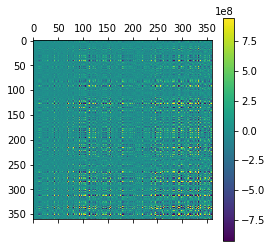

In [87]:
plt.matshow(prec,vmax=np.percentile(prec,99.5),vmin=np.percentile(prec,0.5))
plt.colorbar()